In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, roc_curve

In [3]:
churn_df = pd.read_csv('/content/drive/MyDrive/DATASET/telecom_churn.csv')
print(churn_df.head())
print(churn_df.info())
print(churn_df.isnull().sum())

  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95   

In [4]:
print(churn_df.describe())

       Account length   Area code  Number vmail messages  Total day minutes  \
count      667.000000  667.000000             667.000000         667.000000   
mean       102.841079  436.157421               8.407796         180.948126   
std         40.819480   41.783305              13.994480          55.508628   
min          1.000000  408.000000               0.000000          25.900000   
25%         76.000000  408.000000               0.000000         146.250000   
50%        102.000000  415.000000               0.000000         178.300000   
75%        128.000000  415.000000              20.000000         220.700000   
max        232.000000  510.000000              51.000000         334.300000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count       667.000000        667.000000         667.000000       667.000000   
mean        100.937031         30.761769         203.355322       100.476762   
std          20.396790          9.436463        

In [5]:
churn_df.hist(bins=20, figsize=(14, 10))
plt.show()
sns.pairplot(churn_df, hue='Churn')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

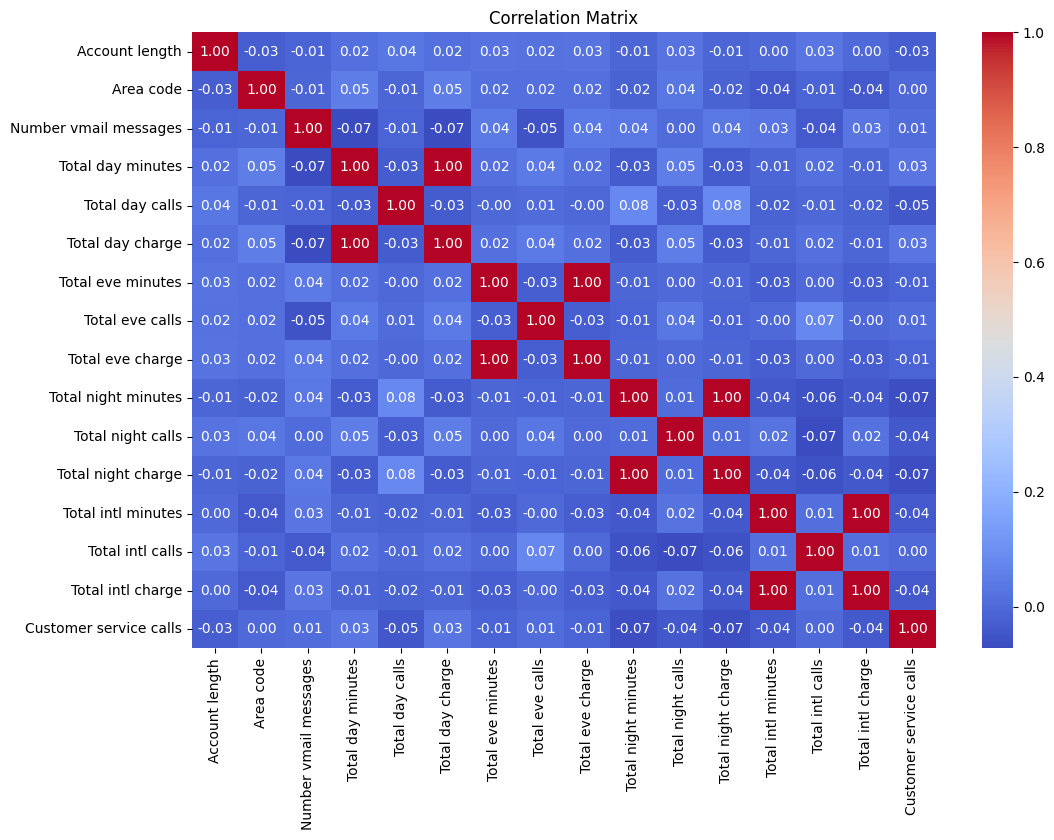

In [7]:
numerical_df = churn_df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
numerical_cols = churn_df.select_dtypes(include=['number']).columns
churn_df[numerical_cols] = churn_df[numerical_cols].fillna(churn_df[numerical_cols].mean())

In [10]:
churn_df = pd.get_dummies(churn_df, drop_first=True)

In [11]:
features = churn_df.columns.drop('Churn')
X = churn_df[features]
y = churn_df['Churn']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

              precision    recall  f1-score   support

       False       0.93      0.94      0.94       119
        True       0.50      0.47      0.48        15

    accuracy                           0.89       134
   macro avg       0.72      0.70      0.71       134
weighted avg       0.88      0.89      0.89       134



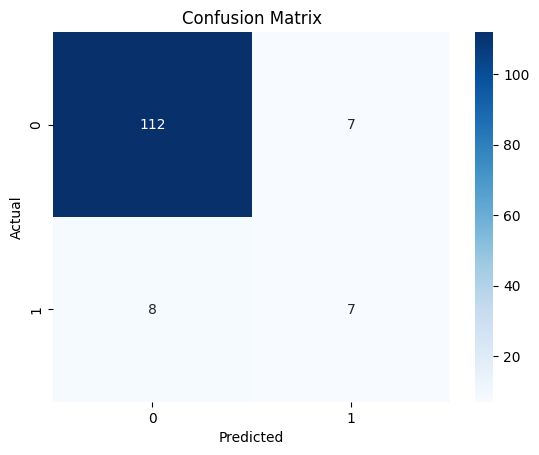

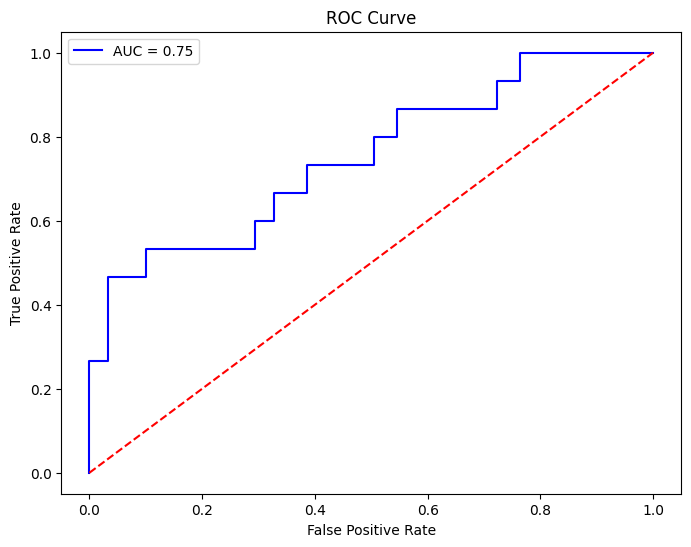

In [17]:
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()